In [2]:
#import os
#os.getcwd()

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import time
import datetime

In [3]:
fitbit = pd.read_csv('/Users/selinzobu/Desktop/TILES/3Fitbitdailysummary.csv', parse_dates = ['Timestamp'])
fitbit = fitbit.loc[:, ~fitbit.columns.str.contains('^Unnamed')]
#fitbit.set_index('days', inplace = True)
print(fitbit.columns)
print(fitbit.shape)
print(fitbit.head())

Index(['Timestamp', 'Cardio_caloriesOut', 'Fat Burn_caloriesOut',
       'Fat Burn_minutes', 'NumberSteps', 'RestingHeartRate',
       'SleepMinutesAsleep', 'SleepMinutesInBed', 'participant_id', 'days'],
      dtype='object')
(13506, 10)
   Timestamp  Cardio_caloriesOut  Fat Burn_caloriesOut  Fat Burn_minutes  \
0 2018-04-09             8.17870             242.66684              53.0   
1 2018-04-10             8.08248             132.39872              28.0   
2 2018-04-11            22.51548             302.70812              61.0   
3 2018-04-12            17.31960              78.32308              19.0   
4 2018-04-13             7.89004             312.61878              59.0   

   NumberSteps  RestingHeartRate  SleepMinutesAsleep  SleepMinutesInBed  \
0        21086              57.0                 409                461   
1        11739              59.0                 371                449   
2         9501              57.0                 466                531   
3   

In [4]:
print(type(fitbit.Timestamp[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [5]:
fitbit["Timestamp"] = pd.to_datetime(fitbit["Timestamp"]).dt.date

In [6]:
print(fitbit.head())

    Timestamp  Cardio_caloriesOut  Fat Burn_caloriesOut  Fat Burn_minutes  \
0  2018-04-09             8.17870             242.66684              53.0   
1  2018-04-10             8.08248             132.39872              28.0   
2  2018-04-11            22.51548             302.70812              61.0   
3  2018-04-12            17.31960              78.32308              19.0   
4  2018-04-13             7.89004             312.61878              59.0   

   NumberSteps  RestingHeartRate  SleepMinutesAsleep  SleepMinutesInBed  \
0        21086              57.0                 409                461   
1        11739              59.0                 371                449   
2         9501              57.0                 466                531   
3        10758              57.0                 406                451   
4        17076              58.0                 427                469   

                         participant_id  days  
0  e6081755-d7f3-4c26-ab40-0709b8ad41e

In [7]:
#fitbit['participant_id'] = fitbit['participant_id'].map(lambda x: x.rstrip('.csv'))

In [8]:
print(fitbit.head())

    Timestamp  Cardio_caloriesOut  Fat Burn_caloriesOut  Fat Burn_minutes  \
0  2018-04-09             8.17870             242.66684              53.0   
1  2018-04-10             8.08248             132.39872              28.0   
2  2018-04-11            22.51548             302.70812              61.0   
3  2018-04-12            17.31960              78.32308              19.0   
4  2018-04-13             7.89004             312.61878              59.0   

   NumberSteps  RestingHeartRate  SleepMinutesAsleep  SleepMinutesInBed  \
0        21086              57.0                 409                461   
1        11739              59.0                 371                449   
2         9501              57.0                 466                531   
3        10758              57.0                 406                451   
4        17076              58.0                 427                469   

                         participant_id  days  
0  e6081755-d7f3-4c26-ab40-0709b8ad41e

In [9]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13506 entries, 0 to 13505
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Timestamp             13506 non-null  object 
 1   Cardio_caloriesOut    13124 non-null  float64
 2   Fat Burn_caloriesOut  13124 non-null  float64
 3   Fat Burn_minutes      13124 non-null  float64
 4   NumberSteps           13506 non-null  int64  
 5   RestingHeartRate      12524 non-null  float64
 6   SleepMinutesAsleep    13506 non-null  int64  
 7   SleepMinutesInBed     13506 non-null  int64  
 8   participant_id        13506 non-null  object 
 9   days                  13506 non-null  int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 1.0+ MB


In [10]:
print(len(fitbit.participant_id.unique())) #208 participants

208


In [11]:
#Missing Data 

fitbit.isnull().sum()

Timestamp                 0
Cardio_caloriesOut      382
Fat Burn_caloriesOut    382
Fat Burn_minutes        382
NumberSteps               0
RestingHeartRate        982
SleepMinutesAsleep        0
SleepMinutesInBed         0
participant_id            0
days                      0
dtype: int64

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # Ignores any warning
warnings.filterwarnings("ignore")

In [13]:
mis_val= fitbit.isna().sum()
mis_val_per = fitbit.isna().sum()/len(fitbit)*100
mis_val_table = pd.concat([mis_val, mis_val_per], axis=1)
mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
mis_val_table_ren_columns = mis_val_table_ren_columns[
       mis_val_table_ren_columns.iloc[:,:] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
mis_val_table_ren_columns

,Missing Values,% of Total Values
RestingHeartRate,982.0,7.3
Cardio_caloriesOut,382.0,2.8
Fat Burn_caloriesOut,382.0,2.8
Fat Burn_minutes,382.0,2.8
Timestamp,NaN,NaN
NumberSteps,NaN,NaN
SleepMinutesAsleep,NaN,NaN
SleepMinutesInBed,NaN,NaN
participant_id,NaN,NaN
days,NaN,NaN


In [14]:
#!pip install missingno 
import missingno as msno

<AxesSubplot:>

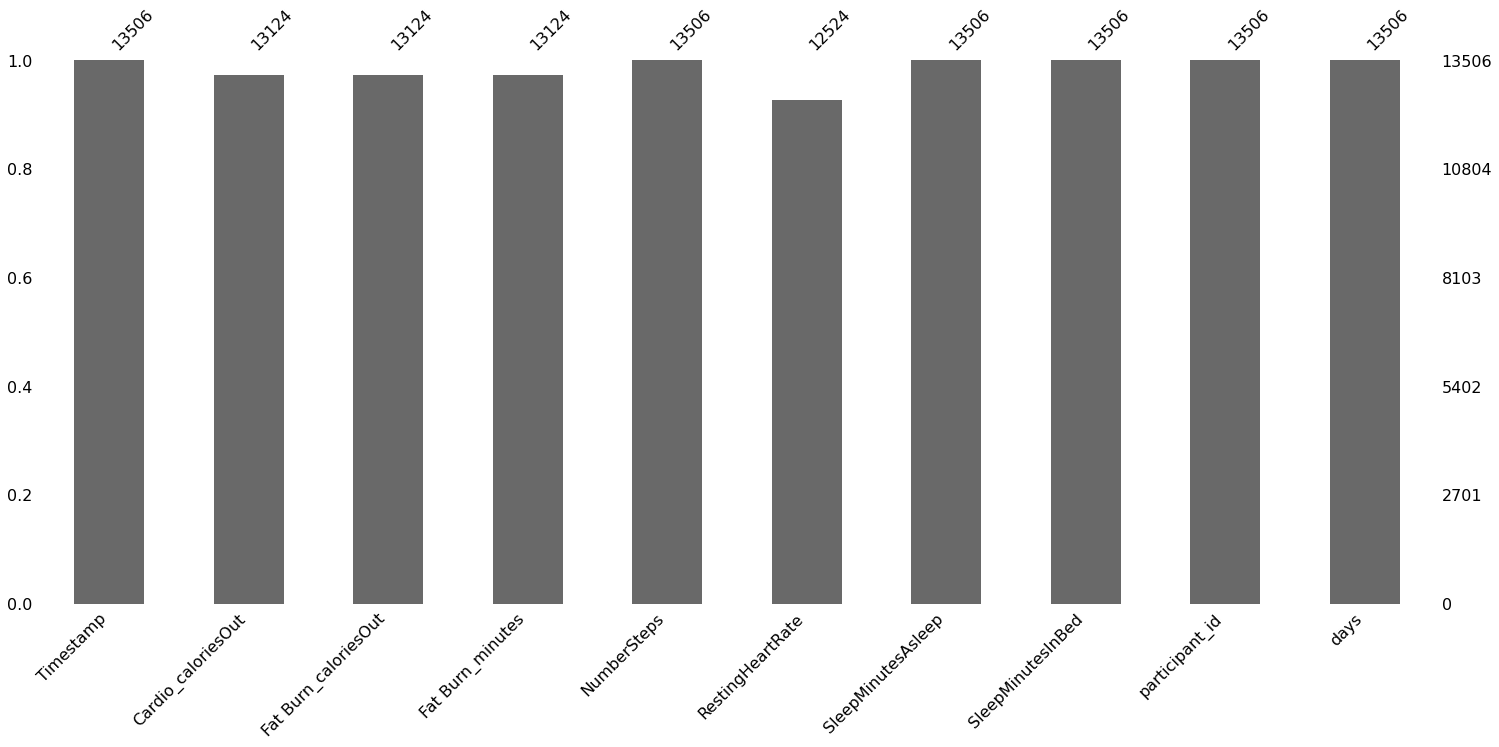

In [15]:
msno.bar(fitbit)

<AxesSubplot:>

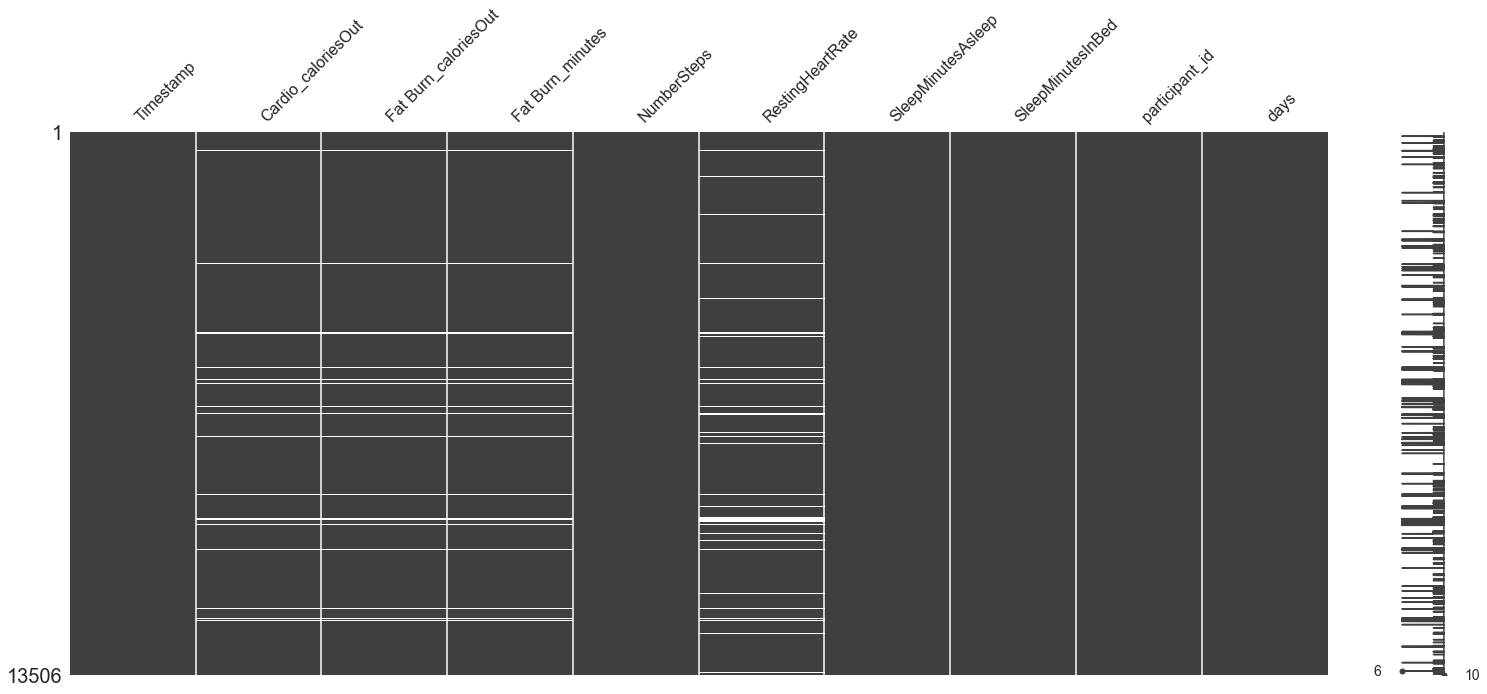

In [64]:
msno.matrix(fitbit)

<AxesSubplot:>

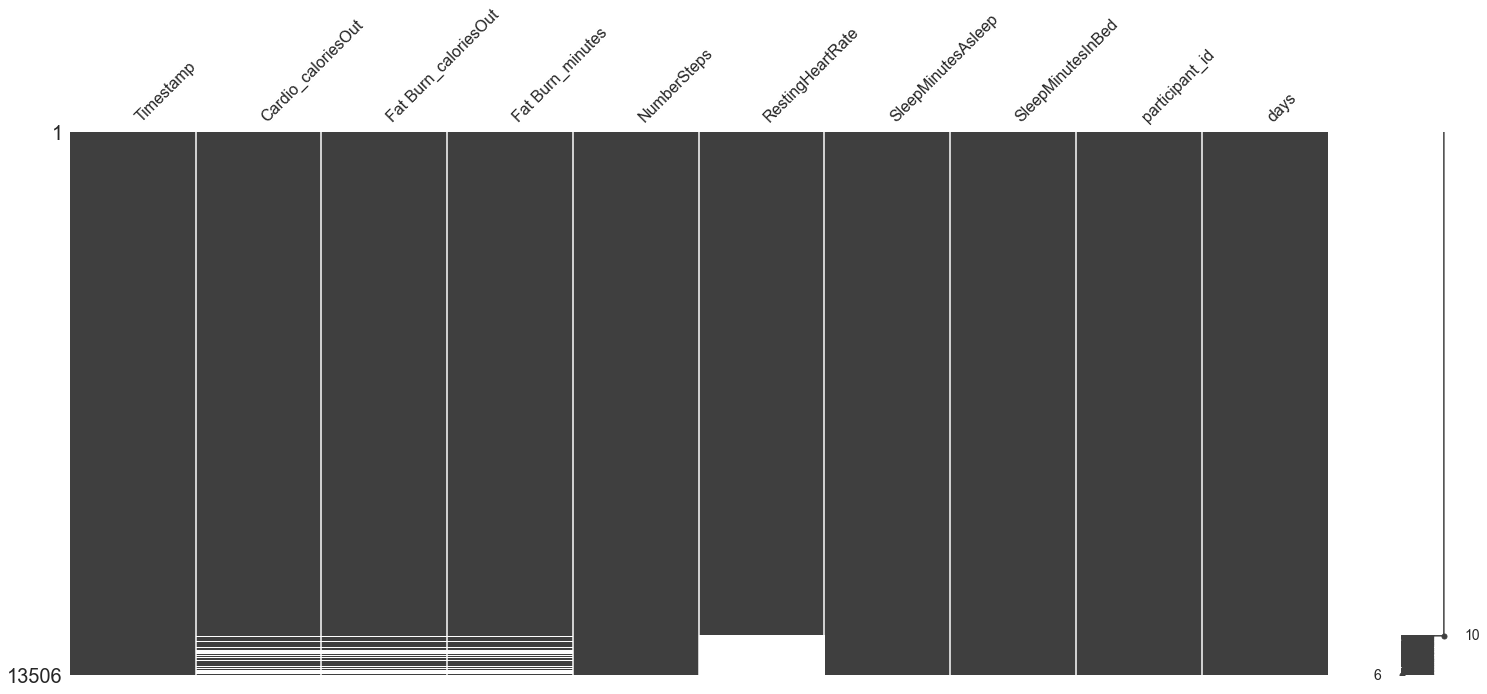

In [65]:
#Let’s sort the value by X column to detect if there is a pattern in the missing values
sorte = fitbit.sort_values('RestingHeartRate')
msno.matrix(sorte)

<AxesSubplot:>

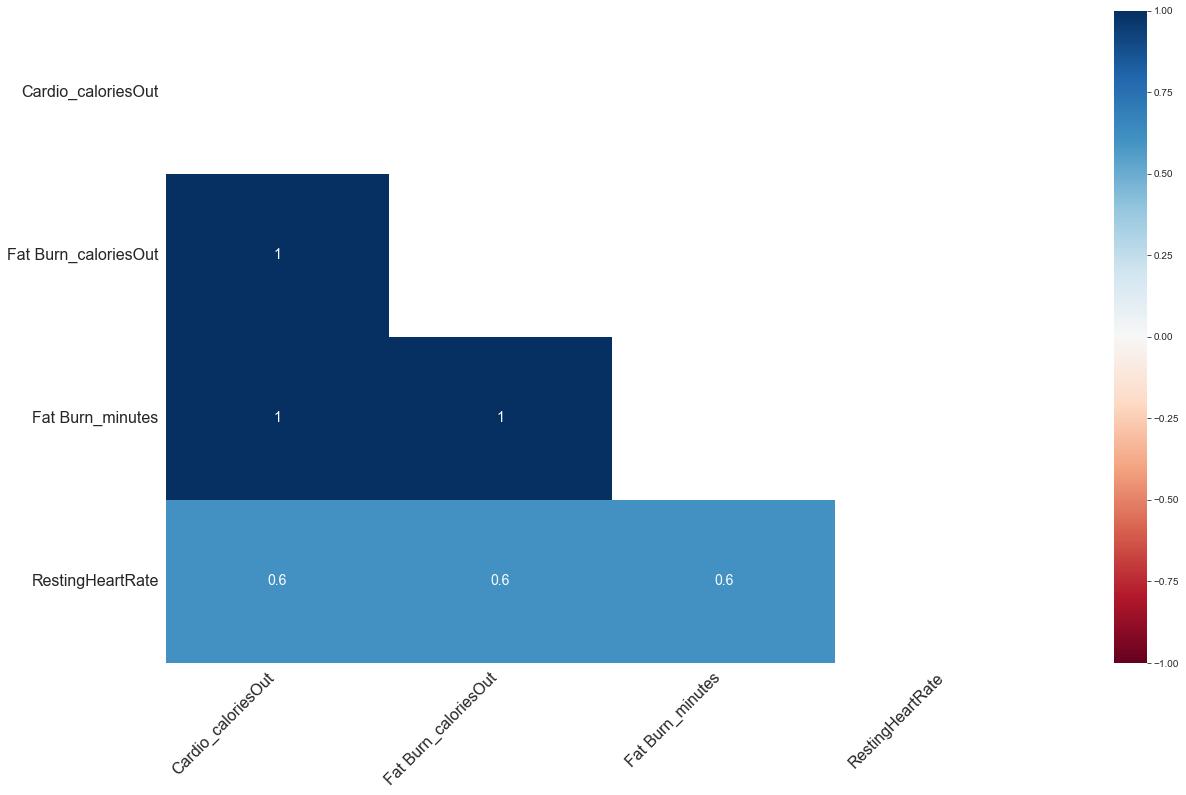

In [66]:
#correlation between the missing values

msno.heatmap(fitbit)

In [16]:
#The values for number of steps that were more than 35,000 and the values for number of minutes asleep that were
#more than 1,000 were replaced with NA. 

len(fitbit['NumberSteps']) #13506

13506

In [17]:
a = fitbit[(fitbit['SleepMinutesAsleep'] > 1000)]
b = fitbit[(fitbit['NumberSteps'] > 35000)]
print(len(a))
print(len(b))

print((a.index))
print()
print((b.index))

8
12
Int64Index([391, 1107, 1950, 2454, 7598, 9363, 10314, 10668], dtype='int64')

Int64Index([260, 5937, 6079, 6567, 6581, 6623, 7326, 11278, 11837, 11848,
            12890, 13115],
           dtype='int64')


In [18]:
fitbit['SleepMinutesAsleep'].iloc[[391, 1107, 1950, 2454, 7598, 9363, 10314, 10668]]

391      1002
1107     1033
1950     1033
2454     1162
7598     1360
9363     1096
10314    1069
10668    1015
Name: SleepMinutesAsleep, dtype: int64

In [19]:
fitbit['SleepMinutesAsleep'].iloc[[391, 1107, 1950, 2454, 7598, 9363, 10314, 10668]] = float("NaN")

In [20]:
fitbit['SleepMinutesAsleep'].iloc[[391, 1107, 1950, 2454, 7598, 9363, 10314, 10668]]

391     NaN
1107    NaN
1950    NaN
2454    NaN
7598    NaN
9363    NaN
10314   NaN
10668   NaN
Name: SleepMinutesAsleep, dtype: float64

In [21]:
fitbit['NumberSteps'].iloc[[260, 5937, 6079, 6567, 6623, 6581, 7326, 11278, 11837, 11848, 12890, 13115]]

260      57237
5937     36398
6079     56707
6567     42118
6623     35921
6581     43285
7326     39734
11278    45107
11837    35920
11848    35142
12890    65292
13115    39544
Name: NumberSteps, dtype: int64

In [22]:
fitbit['NumberSteps'].iloc[[260, 5937, 6079, 6567, 6623, 6581, 7326, 11278, 11837, 11848, 12890, 13115 ]] = float("NaN")

In [23]:
fitbit['NumberSteps'].isnull().any()

True

In [24]:
fitbit['NumberSteps'].iloc[[260, 5937, 6079, 6567, 6623, 6581, 7326, 11278, 11837, 11848, 12890, 13115 ]]

260     NaN
5937    NaN
6079    NaN
6567    NaN
6623    NaN
6581    NaN
7326    NaN
11278   NaN
11837   NaN
11848   NaN
12890   NaN
13115   NaN
Name: NumberSteps, dtype: float64

In [25]:
print(type(fitbit['NumberSteps'][260]))
print(fitbit['NumberSteps'][260])

<class 'numpy.float64'>
nan


In [26]:
len(fitbit[fitbit['SleepMinutesAsleep'].isna()])

8

In [27]:
len(fitbit[fitbit['NumberSteps'].isna()])

12

In [79]:
fitbit[fitbit.RestingHeartRate.isnull()]

,Timestamp,Cardio_caloriesOut,Fat Burn_caloriesOut,Fat Burn_minutes,NumberSteps,RestingHeartRate,SleepMinutesAsleep,SleepMinutesInBed,participant_id,days
113,2018-05-21,NaN,NaN,NaN,7513.0,NaN,0.0,0,c35d219d-59d9-4197-b981-ea0aa6506e79,42
114,2018-05-22,0.00000,0.00000,0.0,319.0,NaN,0.0,0,c35d219d-59d9-4197-b981-ea0aa6506e79,43
133,2018-06-10,0.00000,0.00000,0.0,2246.0,NaN,0.0,0,c35d219d-59d9-4197-b981-ea0aa6506e79,62
135,2018-06-12,0.00000,8.14752,2.0,7123.0,NaN,0.0,0,c35d219d-59d9-4197-b981-ea0aa6506e79,64
137,2018-06-14,0.00000,0.00000,0.0,203.0,NaN,0.0,0,c35d219d-59d9-4197-b981-ea0aa6506e79,66
...,...,...,...,...,...,...,...,...,...,...
13366,2018-06-17,0.00000,7.57440,2.0,76.0,NaN,0.0,0,c29d3319-8920-46b9-9b3a-11c36630c87d,65
13402,2018-06-08,0.00000,85.80275,36.0,3707.0,NaN,0.0,0,d62a5591-4c0c-4c95-9187-faa64b95f9f,35
13403,2018-06-09,NaN,NaN,NaN,8459.0,NaN,0.0,0,d62a5591-4c0c-4c95-9187-faa64b95f9f,36
13443,2018-04-15,0.00000,237.66522,81.0,1596.0,NaN,415.0,463,f983485d-f954-4693-9c2c-981710c06dd0,5


In [28]:
fitbit.isnull().sum()

Timestamp                 0
Cardio_caloriesOut      382
Fat Burn_caloriesOut    382
Fat Burn_minutes        382
NumberSteps              12
RestingHeartRate        982
SleepMinutesAsleep        8
SleepMinutesInBed         0
participant_id            0
days                      0
dtype: int64

In [33]:
#fitbit['participant_id'] = str(fitbit['participant_id'])

In [29]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13506 entries, 0 to 13505
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Timestamp             13506 non-null  object 
 1   Cardio_caloriesOut    13124 non-null  float64
 2   Fat Burn_caloriesOut  13124 non-null  float64
 3   Fat Burn_minutes      13124 non-null  float64
 4   NumberSteps           13494 non-null  float64
 5   RestingHeartRate      12524 non-null  float64
 6   SleepMinutesAsleep    13498 non-null  float64
 7   SleepMinutesInBed     13506 non-null  int64  
 8   participant_id        13506 non-null  object 
 9   days                  13506 non-null  int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 1.0+ MB


In [30]:
partdayfit = fitbit.groupby('participant_id')['days'].count()
print(partdayfit)

#graph this! bar??

participant_id
02581754-36cd-4b23-85ea-bf995c6dec83    59
0271c478-a56a-4c09-ab91-9743184dd71b    71
02b7a595-6508-46bd-8239-6deb433d6290    71
05dedb61-63bc-44e3-8e28-a5d32d91f7e9    67
06b33ec4-706d-462f-a681-05491be38eb3    71
                                        ..
fae38580-1e2d-4491-9de5-7b75703ba4ce    71
fb3a4dd7-3cb5-438e-a75d-244d1aec4790    22
fcb14a4c-1ffa-4315-872a-a38833459885    71
fd79ab30-1199-4619-adbd-577d715d86ce    63
fdbd8c07-720c-4ae5-a3d8-aad56b54688     71
Name: days, Length: 208, dtype: int64


In [31]:
ptfit = fitbit.groupby('participant_id')['Timestamp'].count()

print(ptfit)

participant_id
02581754-36cd-4b23-85ea-bf995c6dec83    59
0271c478-a56a-4c09-ab91-9743184dd71b    71
02b7a595-6508-46bd-8239-6deb433d6290    71
05dedb61-63bc-44e3-8e28-a5d32d91f7e9    67
06b33ec4-706d-462f-a681-05491be38eb3    71
                                        ..
fae38580-1e2d-4491-9de5-7b75703ba4ce    71
fb3a4dd7-3cb5-438e-a75d-244d1aec4790    22
fcb14a4c-1ffa-4315-872a-a38833459885    71
fd79ab30-1199-4619-adbd-577d715d86ce    63
fdbd8c07-720c-4ae5-a3d8-aad56b54688     71
Name: Timestamp, Length: 208, dtype: int64


In [32]:
fitbit.isnull().sum()

Timestamp                 0
Cardio_caloriesOut      382
Fat Burn_caloriesOut    382
Fat Burn_minutes        382
NumberSteps              12
RestingHeartRate        982
SleepMinutesAsleep        8
SleepMinutesInBed         0
participant_id            0
days                      0
dtype: int64

In [33]:
#drop a row if any of its values are missing

print(fitbit.shape)
fitbit.dropna(how = 'any', inplace = True)
print(fitbit.shape)

print(13506 - 12505)  #982 ...update: 1001 rows are gone

(13506, 10)
(12505, 10)
1001


In [34]:
fitbit.shape #(12524, 13 > 9) , (12505, 13 > 9)

(12505, 10)

In [35]:
print(len(fitbit.participant_id.unique())) #193 > 208 participants

208


In [41]:
#print(fitbit['days'].value_counts())  # value - time it happens
#86 days from 1 participant?? 76 and 72 from one of each as well
#70 days from 97 of them...

In [35]:
#print(fitbit['Out of Range_min'].value_counts()) 
#fitbit = fitbit.drop(labels = 'Out of Range_min', axis = 1)

In [40]:
#Visualize

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

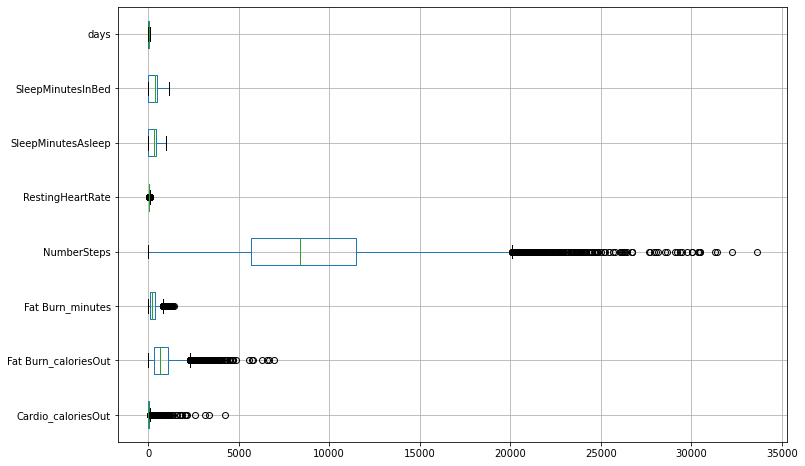

In [52]:
plt.figure(figsize = (12,8))
fitbit.boxplot(vert = False)
plt.show()

In [42]:
print(fitbit['SleepMinutesInBed'].max())

1143


In [43]:
print(fitbit.columns)

Index(['Timestamp', 'Cardio_caloriesOut', 'Fat Burn_caloriesOut',
       'Fat Burn_minutes', 'NumberSteps', 'RestingHeartRate',
       'SleepMinutesAsleep', 'SleepMinutesInBed', 'participant_id', 'days'],
      dtype='object')


{'whiskers': [<matplotlib.lines.Line2D at 0x7fa1b80603a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa1b8060a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa1fb3f0f10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa1b806e160>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa1b806e4f0>],
 'means': []}

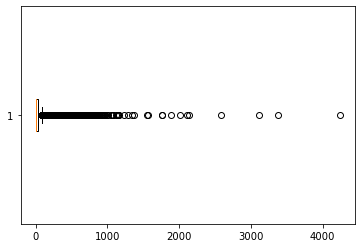

In [37]:
plt.boxplot(fitbit.Cardio_caloriesOut, vert = False)
#skewed, many outliers, boundaries are very squized, problemmmm

In [45]:
#plt.boxplot(fitbit.Cardio_min, vert = False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff1d0044cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff1d0053430>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff1d0044940>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff1d0053b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff1d0053ee0>],
 'means': []}

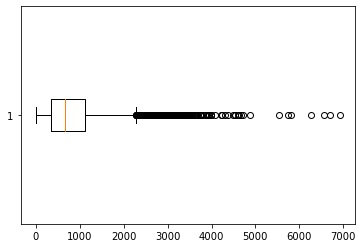

In [46]:
plt.boxplot(fitbit['Fat Burn_caloriesOut'], vert = False)
#problemmm

In [48]:
#plt.boxplot(fitbit['Fat Burn_min'], vert = False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff24229b4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff24229bbe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff24229b130>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff242356340>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff2423566d0>],
 'means': []}

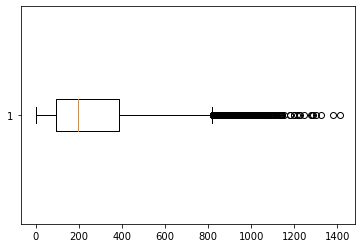

In [49]:
plt.boxplot(fitbit['Fat Burn_minutes'], vert = False)
#probleemm

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff1e02e2d30>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff1e02f3490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff242386370>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff1e02f3bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff1e02f3f40>],
 'means': []}

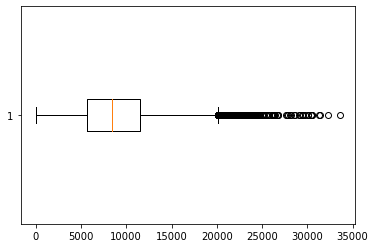

In [50]:
plt.boxplot(fitbit['NumberSteps'], vert = False)
#problemmm

In [52]:
#plt.boxplot(fitbit['Peak_min'], vert = False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff2420dd610>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff2420dd820>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff211ac6100>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff1d00965b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff1d0096310>],
 'means': []}

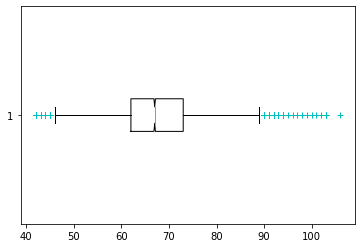

In [53]:
plt.boxplot(fitbit['RestingHeartRate'], 1, sym = 'c+', vert = False) 
#probleeemmmm

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff2420c6e20>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff242419580>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff2420c6a90>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff242419cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff2424230a0>],
 'means': []}

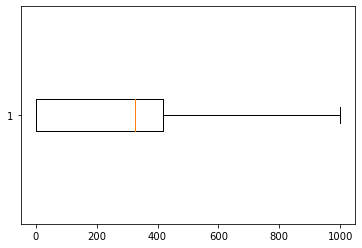

In [54]:
plt.boxplot(fitbit['SleepMinutesAsleep'], vert = False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa2286a2160>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa2286a2880>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa1fb579d90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa2286a2fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa2286ac370>],
 'means': []}

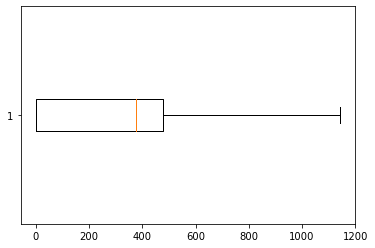

In [38]:
plt.boxplot(fitbit['SleepMinutesInBed'], vert = False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8bb096edf0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8bb097e550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8bb096ea60>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8bb097ec70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8bb098c040>],
 'means': []}

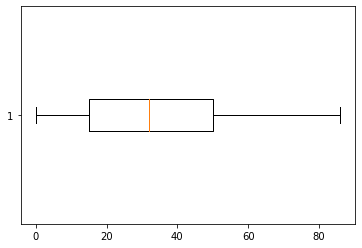

In [35]:
plt.boxplot(fitbit['days'], vert = False)
#median line, average days are around 35??

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8b80175850>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8b80175eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8b80175400>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8b80186610>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8b80186d30>],
 'means': [<matplotlib.lines.Line2D at 0x7f8b801869a0>]}

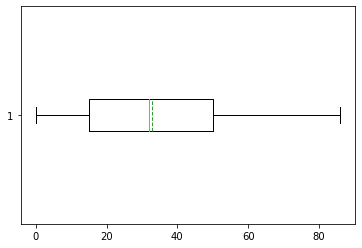

In [34]:
plt.boxplot(fitbit['days'], meanline = True, showmeans= True, vert= False)

<AxesSubplot:xlabel='days', ylabel='count'>

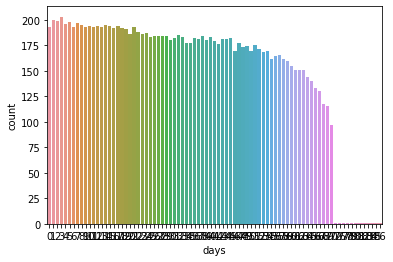

In [33]:
sns.countplot(fitbit['days'])

In [89]:
sns.set_style('darkgrid')

<AxesSubplot:xlabel='days', ylabel='count'>

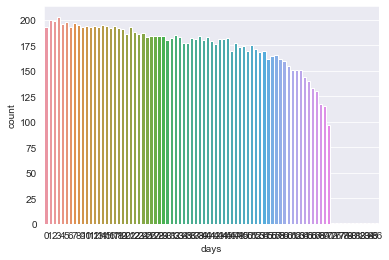

In [90]:
sns.countplot(x= 'days', data = fitbit)

In [36]:
by_day = fitbit['days'].value_counts()
print(by_day)

3     203
1     200
2     199
5     198
7     197
     ... 
79      1
78      1
76      1
72      1
86      1
Name: days, Length: 83, dtype: int64


<AxesSubplot:xlabel='days', ylabel='count'>

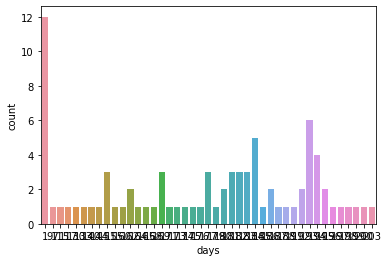

In [37]:
sns.countplot(fitbit['days'].value_counts())

In [38]:
fitbit.days.value_counts().index

Int64Index([ 3,  1,  2,  5,  7,  4,  8, 14, 17, 15, 10, 12, 13,  0, 11,  6,  9,
            21, 18, 16, 19, 22, 24, 20, 23, 32, 38, 29, 28, 27, 26, 25, 33, 40,
            31, 45, 36, 44, 37, 43, 39, 30, 41, 35, 47, 34, 42, 51, 49, 48, 52,
            46, 50, 54, 53, 57, 56, 55, 58, 59, 60, 62, 63, 61, 64, 65, 66, 67,
            68, 69, 70, 81, 85, 84, 83, 82, 77, 80, 79, 78, 76, 72, 86],
           dtype='int64')

<AxesSubplot:xlabel='days', ylabel='count'>

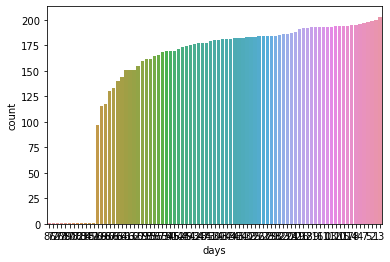

In [39]:
sns.countplot(x = 'days', data = fitbit, order = fitbit.days.value_counts().index[::-1])

<AxesSubplot:xlabel='count', ylabel='days'>

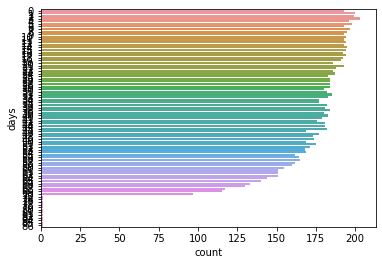

In [40]:
sns.countplot(y = 'days', data = fitbit, lw = 4)

In [43]:
print(type(fitbit['days'].value_counts()))
fitbit['days'].value_counts()

<class 'pandas.core.series.Series'>


3     203
1     200
2     199
5     198
7     197
     ... 
79      1
78      1
76      1
72      1
86      1
Name: days, Length: 83, dtype: int64

In [45]:
fitbit.isnull().sum()

Timestamp               0
Cardio_caloriesOut      0
Fat Burn_caloriesOut    0
Fat Burn_minutes        0
NumberSteps             0
RestingHeartRate        0
SleepMinutesAsleep      0
SleepMinutesInBed       0
participant_id          0
days                    0
dtype: int64

In [42]:
#Outliers : Z Score

outliers = []
def detect_outliers(data):
    threshold =3
    mean = np.mean(data)
    std = np.std(data)
    
    
    for i in data:
        z_score = (i - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [43]:
outlier_cal = detect_outliers(fitbit.Cardio_caloriesOut)
print(len(outlier_cal))#799...769 > 212

212


In [44]:
outlier_carmin = detect_outliers(fitbit.Cardio_min)
print(len(outlier_carmin))#807...557 > 220

220


In [45]:
outlier_fatmin = detect_outliers(fitbit['Fat Burn_caloriesOut'])
print(len(outlier_fatmin))#971...549 > 383

383


In [46]:
outlier_fmin = detect_outliers(fitbit['Fat Burn_min'])
print(len(outlier_fmin))#987...386 > 391

391


In [47]:
outlier_fmins = detect_outliers(fitbit['Fat Burn_minutes'])
print(len(outlier_fmins))#1116...378> 521

521


In [48]:
outlier_nums = detect_outliers(fitbit['NumberSteps'])
print(len(outlier_nums)) #1217 ...107> 628

628


In [109]:
#outlier_orm = detect_outliers(fitbit['Out of Range_min'])
#print(len(outlier_orm))

In [49]:
outlier_pm = detect_outliers(fitbit['Peak_min'])
print(len(outlier_pm))#1225...248  > 636

636


In [50]:
outlier_rhr = detect_outliers(fitbit['RestingHeartRate'])
print(len(outlier_rhr)) #1349...240 > 760

760


In [51]:
outlier_sma = detect_outliers(fitbit['SleepMinutesAsleep'])
print(len(outlier_sma)) #1365 ...116 > 769

769


In [52]:
outlier_smi = detect_outliers(fitbit['SleepMinutesInBed'])
print(len(outlier_smi))#1381...777 > 777

777


In [53]:
outlier_d = detect_outliers(fitbit['days'])
print(len(outlier_d))#1381...777 > 777

777


In [54]:
print(fitbit.days.value_counts()[0]) #194...193

193


In [55]:
for col in fitbit.columns:
    print(col)

Timestamp
Cardio_caloriesOut
Cardio_min
Fat Burn_caloriesOut
Fat Burn_min
Fat Burn_minutes
NumberSteps
Peak_min
RestingHeartRate
SleepMinutesAsleep
SleepMinutesInBed
days


In [117]:
#Outliers : Scatter plot & Boxplots

In [44]:
from pylab import rcParams
import seaborn as sns

In [45]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sns.set_style('whitegrid')

<AxesSubplot:xlabel='days', ylabel='NumberSteps'>

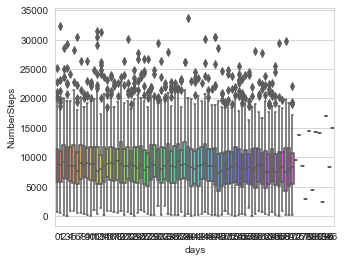

In [58]:
sns.boxplot(x = 'days',y = 'NumberSteps', data = fitbit, palette = 'hls')

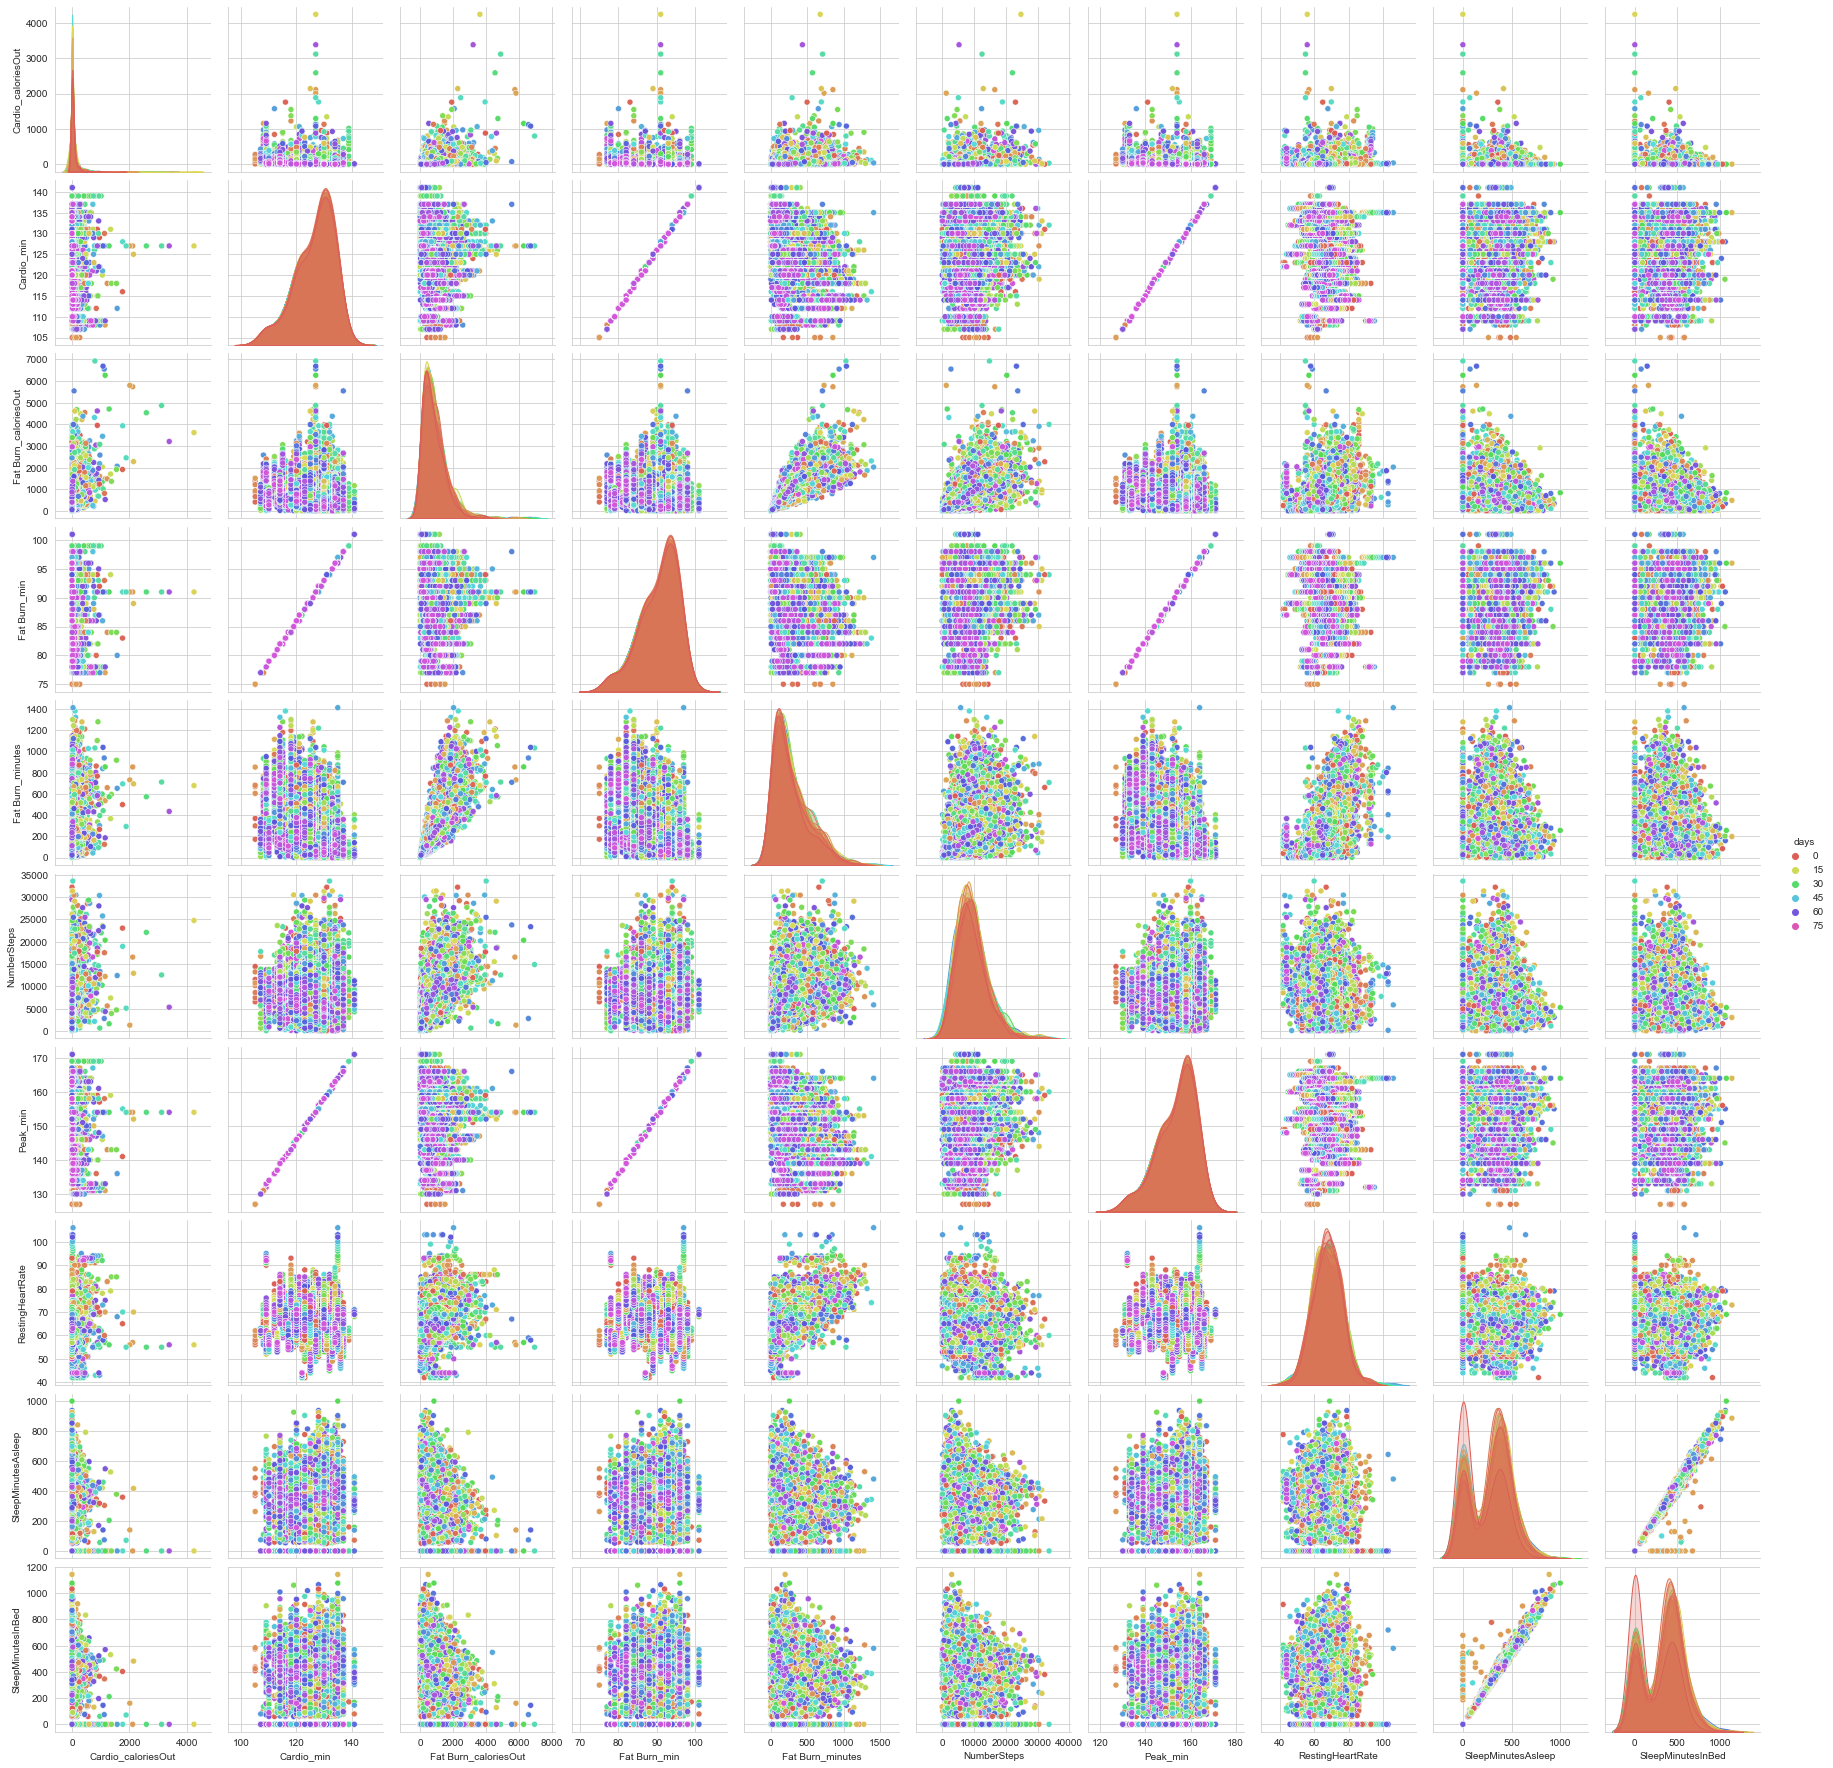

In [121]:
sns.pairplot(fitbit, hue = 'days', palette = 'hls')

<AxesSubplot:xlabel='days', ylabel='Density'>

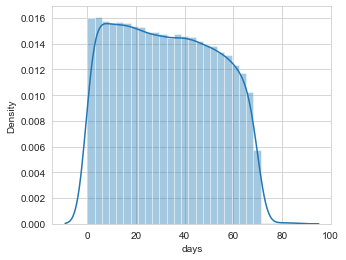

In [122]:
sns.distplot(fitbit['days'])

<AxesSubplot:xlabel='Cardio_caloriesOut', ylabel='Density'>

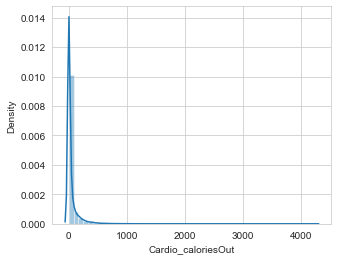

In [123]:
sns.distplot(fitbit['Cardio_caloriesOut'])

<AxesSubplot:xlabel='Cardio_min', ylabel='Density'>

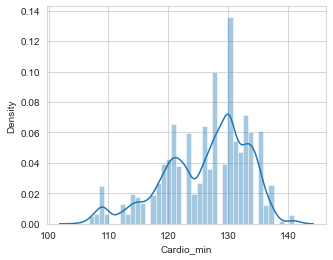

In [124]:
sns.distplot(fitbit['Cardio_min'])

<AxesSubplot:xlabel='Fat Burn_caloriesOut', ylabel='Density'>

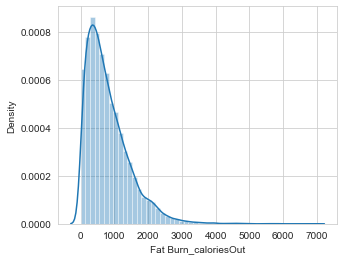

In [125]:
sns.distplot(fitbit['Fat Burn_caloriesOut'])

<AxesSubplot:xlabel='Fat Burn_min', ylabel='Density'>

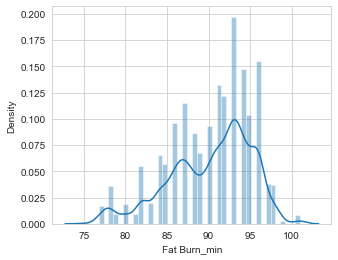

In [126]:
sns.distplot(fitbit['Fat Burn_min'])

<AxesSubplot:xlabel='Fat Burn_minutes', ylabel='Density'>

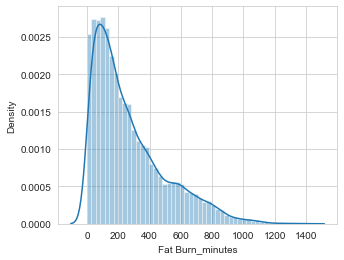

In [127]:
sns.distplot(fitbit['Fat Burn_minutes'])

<AxesSubplot:xlabel='SleepMinutesInBed', ylabel='Density'>

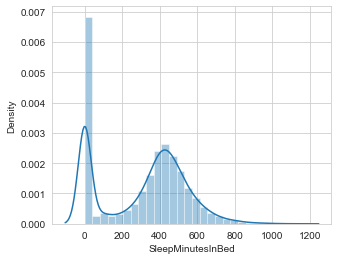

In [128]:
sns.distplot(fitbit['SleepMinutesInBed'])

<AxesSubplot:xlabel='SleepMinutesAsleep', ylabel='Density'>

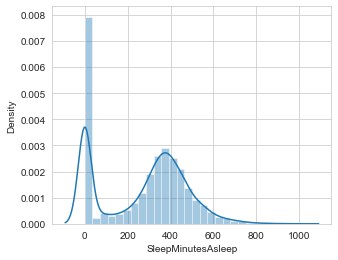

In [129]:
sns.distplot(fitbit['SleepMinutesAsleep'])

<AxesSubplot:xlabel='RestingHeartRate', ylabel='Density'>

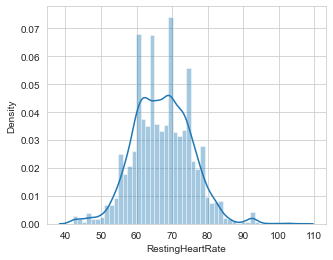

In [130]:
sns.distplot(fitbit['RestingHeartRate'])

<AxesSubplot:xlabel='Peak_min', ylabel='Density'>

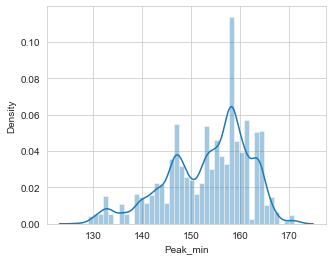

In [131]:
sns.distplot(fitbit['Peak_min'])

In [132]:
print(fitbit.columns)

Index(['Timestamp', 'Cardio_caloriesOut', 'Cardio_min', 'Fat Burn_caloriesOut',
       'Fat Burn_min', 'Fat Burn_minutes', 'NumberSteps', 'Peak_min',
       'RestingHeartRate', 'SleepMinutesAsleep', 'SleepMinutesInBed', 'days'],
      dtype='object')


<AxesSubplot:xlabel='NumberSteps', ylabel='Density'>

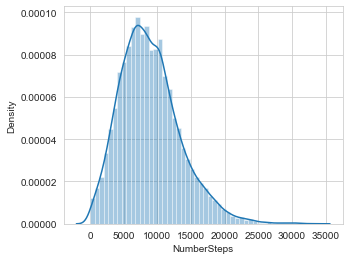

In [133]:
sns.distplot(fitbit['NumberSteps'])

In [42]:
print(len(fitbit['participant_id'].unique()))

208


In [39]:
#converting outlier values to missing values

def outlier_limits(col):
    Q3, Q1 = np.nanpercentile(col, [75,25])
    IQR = Q3 - Q1
    UL = Q3 + 1.5 * IQR
    LL = Q1 - 1.5 * IQR
    return UL, LL

In [40]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12505 entries, 0 to 13505
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Timestamp             12505 non-null  object 
 1   Cardio_caloriesOut    12505 non-null  float64
 2   Fat Burn_caloriesOut  12505 non-null  float64
 3   Fat Burn_minutes      12505 non-null  float64
 4   NumberSteps           12505 non-null  float64
 5   RestingHeartRate      12505 non-null  float64
 6   SleepMinutesAsleep    12505 non-null  float64
 7   SleepMinutesInBed     12505 non-null  int64  
 8   participant_id        12505 non-null  object 
 9   days                  12505 non-null  int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 1.0+ MB


In [41]:
fitbit2 = fitbit.drop(labels = ['Timestamp', 'participant_id'], axis = 1)

In [46]:
for column in fitbit2.columns:
    if (fitbit2[column].dtype != 'datetime64[ns]'):
        UL, LL = outlier_limits(fitbit2[column])
        fitbit2[column] = np.where((fitbit2[column] > UL) | (fitbit2[column] < LL), np.nan, fitbit2[column])

NameError: name 'fitbit2' is not defined

In [88]:
fitbit.isnull().sum()

Timestamp               0
Cardio_caloriesOut      0
Fat Burn_caloriesOut    0
Fat Burn_minutes        0
NumberSteps             0
RestingHeartRate        0
SleepMinutesAsleep      0
SleepMinutesInBed       0
participant_id          0
days                    0
dtype: int64

In [89]:
print(fitbit.shape)

(12505, 10)


In [66]:
fitbit2.isnull().sum()

'''Cardio_caloriesOut      1780
Fat Burn_caloriesOut     375
Fat Burn_minutes         358
NumberSteps              226
RestingHeartRate         198'''

Cardio_caloriesOut      1780
Fat Burn_caloriesOut     375
Fat Burn_minutes         358
NumberSteps              226
RestingHeartRate         198
SleepMinutesAsleep         0
SleepMinutesInBed          0
days                       0
dtype: int64

In [45]:
print(fitbit2.shape) #12505, 12
fitbit2.dropna(how = 'any', inplace = True)
print(fitbit2.shape) #(10208, 12)

(12505, 8)
(10212, 8)


In [49]:
print(fitbit.days.value_counts()[0]) #193 participants
print(len(fitbit['participant_id'].unique())) #208

193
208


In [48]:
print(fitbit2.days.value_counts()[0]) #158 participants

158


In [50]:
print(fitbit.days.value_counts().max())

203


In [50]:
#print(fitbit[30:90])

In [91]:
os.makedirs('/Users/selinzobu/Desktop/TILES/', exist_ok=True)  
fitbit.to_csv('/Users/selinzobu/Desktop/TILES/1FITBIT.csv') 